# Sci-Kit Learn Intro

Sci-kit Learn (also referred to as sklearn) 

In [98]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

### Load data

Diabetes dataset in the sklearn library [(see documentation).](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

Features have been preprocessed: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

**Features (X)**
* age- age in years

* sex

* bmi- body mass index

* bp- average blood pressure

* s1- tc, total serum cholesterol

* s2- ldl, low-density lipoproteins

* s3- hdl, high-density lipoproteins

* s4- tch, total cholesterol / HDL

* s5- ltg, possibly log of serum triglycerides level

* s6- glu, blood sugar level

**Target (Y)**

quantitative measure of disease progression one year after baseline

In [77]:
# Load the diabetes dataset from sklearn
X_d_pd, y_d_pd = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [78]:
print(X_d_pd.shape, y_d_pd.shape)

(442, 10) (442,)


In [79]:
X_d_pd.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [108]:
X_d_pd.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [80]:
y_d_pd.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

### Train and Evaluate Regressor

Models the relationship between variables **X** and continuous target variable **y**.

In [81]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [82]:
# sklearn uses numpy matrices, so we will convert our dataframe to np matrix

X_d = X_d_pd.to_numpy()
y_d = y_d_pd.to_numpy()

In [83]:
print(X.shape, y.shape)

(442, 10) (442,)


In [84]:
# form train-test splits
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.25, random_state=42)

In [85]:
print(X_d_train.shape, y_d_train.shape)
print(X_d_test.shape, y_d_test.shape)

(331, 10) (331,)
(111, 10) (111,)


In [86]:
# instantiate our regressor
regr = linear_model.LinearRegression()

In [87]:
# fit the model to our train data (also called training)
regr.fit(X_d_train, y_d_train)

LinearRegression()

In [91]:
# make predictions on the test set
y_d_pred = regr.predict(X_d_test)

In [92]:
# evaluate using root mean squared error
np.sqrt(mean_squared_error(y_d_test, y_d_pred))

53.36942296795931

In [40]:
# we can look at the regression coefficients to determine which features were more/less informative
coef_dict = {}
for name, coef in zip(X_d_pd.columns, regr.coef_):
    coef_dict[name] = coef
    print(name, coef)

age 47.746571173531095
sex -241.9918036108793
bmi 531.968568964711
bp 381.56529921822465
s1 -918.4902055208888
s2 508.25147384684465
s3 116.94040498015747
s4 269.48508570884457
s5 695.8062205026956
s6 26.323431441266724


In [105]:
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['coefficient'])

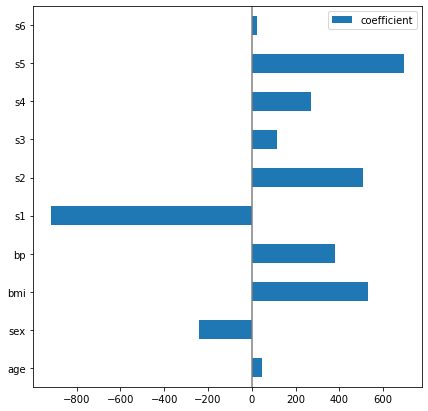

In [107]:
coef_df.plot(kind='barh', figsize=(9, 7))
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [43]:
regr.intercept_

151.66516982689936

In [36]:
import matplotlib.pyplot as plt

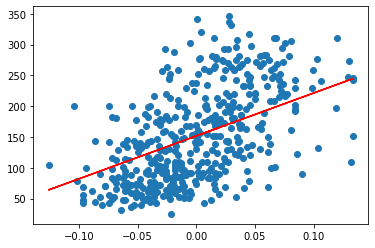

In [45]:
plt.scatter(X_d_pd['s5'], y_d_pd)
plt.plot(X_d_pd['s5'], coef_dict['s5']* X_d_pd['s5'] + regr.intercept_, color='red')

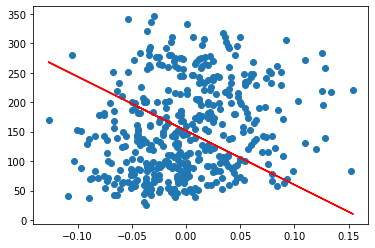

In [50]:
plt.scatter(X_d_pd['s1'], y_d_pd)
plt.plot(X_d_pd['s1'], coef_dict['s1']* X_d_pd['s1'] + regr.intercept_, color='red')

## Logistic Regression

Used to model a binary dependent variable (this problem can also be called classification).

### Load data

Iris dataset in the sklearn library [(see documentation).](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset)

**Features**
* sepal length in cm

* sepal width in cm

* petal length in cm

* petal width in cm

**Classes**
* Iris-Setosa

* Iris-Versicolour

* Iris-Virginica

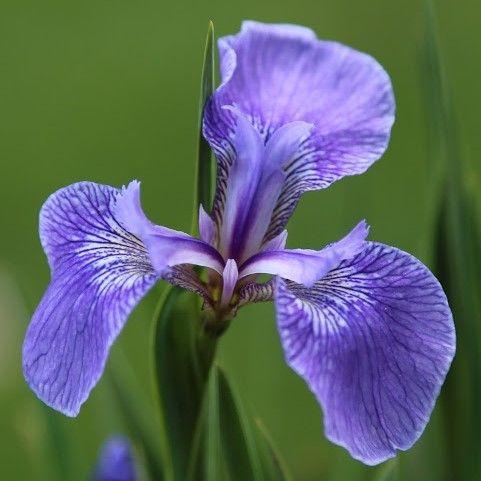

In [ ]:
X_i_pd, y_i_pd = datasets.load_iris(return_X_y=True, as_frame=True)

In [56]:
print(X_i_pd.shape, y_i_pd.shape)

(150, 4) (150,)


In [58]:
X_i_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
X_i_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
y_i_pd.unique()

array([0, 1, 2])

### Train and evaluate classifier

In [62]:
# sklearn uses numpy matrices, so we will convert our dataframe to np matrix

X_i = X_i_pd.to_numpy()
y_i = y_i_pd.to_numpy()

In [63]:
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(X_i, y_i, test_size=0.25, random_state=42)

In [64]:
clf = linear_model.LogisticRegression()

In [65]:
clf.fit(X_i_train, y_i_train)

LogisticRegression()

In [67]:
y_i_pred = clf.predict(X_i_test)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [69]:
accuracy_score(y_i_test, y_i_pred)

1.0

In [73]:
confusion_matrix(y_i_test, y_i_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

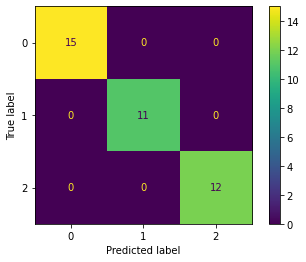

In [74]:
plot_confusion_matrix(clf, X_i_test, y_i_test)